# Laboratorio 10

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

%matplotlib inline

In [2]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
target_names = breast_cancer.target_names

## Ejercicio 1

(1 pto.)

Ajusta una regresión logística a los datos de entrenamiento y obtén el _accuracy_ con los datos de test. Utiliza el argumento `n_jobs` igual a $-1$, si aún así no converge aumenta el valor de `max_iter`.

Hint: Recuerda que el _accuracy_ es el _score_ por defecto en los modelos de clasificación de scikit-learn.

In [3]:
lr = LogisticRegression(n_jobs=-1, max_iter=400).fit(X_train, y_train)

print(f"Logistic Regression accuracy: {lr.score(X_test, y_test)}")

Logistic Regression accuracy: 0.9649122807017544


In [4]:
print("Nice")

Nice


## Ejercicio 2

(1 pto.)

Utiliza `GridSearchCV` con 5 _folds_ para encontrar el mejor valor de `n_neighbors` de un modelo KNN.

In [5]:
knn = KNeighborsClassifier()
#Dont make any mistkaes pal; this is no grid, this is a dictionary!
knn_grid = {"n_neighbors": np.arange(2, 31)}

knn_cv = GridSearchCV(
    knn, knn_grid
)
knn_cv.fit(X_train, y_train)
display(pd.DataFrame.from_dict(knn_cv.cv_results_).sort_values(by="mean_test_score", ascending=False).head())

display(knn.get_params())
knn.set_params(n_neighbors=8)
#Ya know, neighbour should also be accepted with neighbor...

knn.fit(X_train, y_train)
knn.score(X_test, y_test)
#knn.fit(n_neighbors=knn_cv.cv_results_["n_neighbors"])



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.002400,0.001516,0.009472,0.003034,8,{'n_neighbors': 8},0.9375,0.9000,0.9500,0.898734,0.898734,0.916994,0.022206,1
3,0.001894,0.000248,0.008138,0.000871,5,{'n_neighbors': 5},0.9125,0.9000,0.9500,0.886076,0.924051,0.914525,0.021788,2
8,0.002001,0.000294,0.009141,0.000675,10,{'n_neighbors': 10},0.9250,0.9000,0.9750,0.886076,0.886076,0.914430,0.033456,3
5,0.004150,0.001151,0.013457,0.000916,7,{'n_neighbors': 7},0.9375,0.9000,0.9250,0.886076,0.911392,0.911994,0.018087,4
10,0.002811,0.001360,0.010274,0.002171,12,{'n_neighbors': 12},0.9125,0.9125,0.9625,0.886076,0.886076,0.911930,0.027910,5


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

0.9649122807017544

In [6]:
print(f"KNN accuray: {knn.score(X_test, y_test)}")

KNN accuray: 0.9649122807017544


## Ejercicio 3

(1 pto.)

¿Cuál modelo escogerías basándote en los resultados anteriores? Justifica

__Respuesta:__ # Tengo la ligera impresion de que hay como un unico o una familia pequenha de datos atipicos en ambos modelos que hacen exactamente el mismo error en los mismos. Por lo tanto, por criterio de KISS, escogeria la regresion logistica.

## Ejercicio 4

(1 pto.)

Para el modelo seleccionado en el ejercicio anterior.

* Grafica la matriz de confusión (no olvides colocar los nombres originales en los _labels_).
* Imprime el reporte de clasificación.

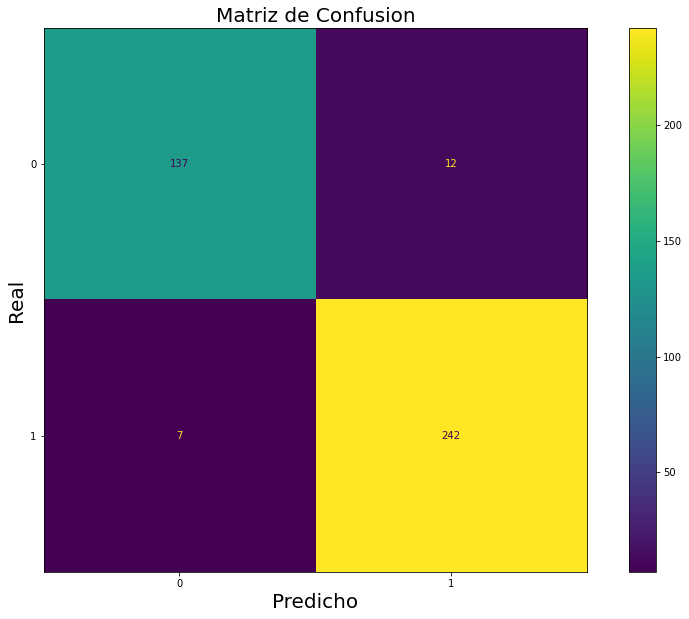

In [7]:
fig, ax=plt.subplots(1, 1, figsize=(15, 10))
plot_confusion_matrix(lr, X_train, y_train, ax=ax)
ax.set_title("Matriz de Confusion", fontsize=20)
ax.set_xlabel("Predicho", fontsize=20)
ax.set_ylabel("Real", fontsize=20)
plt.show()

In [8]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

